<a href="https://colab.research.google.com/github/Rahul1498/Linear-Regression/blob/main/Linear_Regression_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd


In [26]:
db = pd.read_csv('/content/insurance.csv')
db.info


<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [27]:
db

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
db.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [29]:
null_counts = db.isnull().sum()
print("Number of null values for each column:")
print(null_counts)

Number of null values for each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


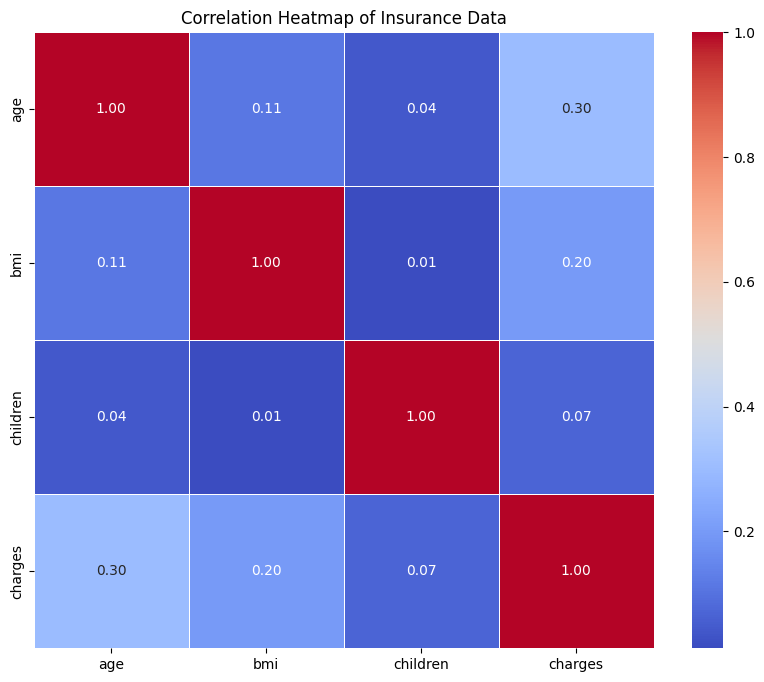

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = db.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Insurance Data')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# Assuming 'charges' is the target variable
X = db.drop('charges', axis=1)
y = db['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1070, 6)
Shape of X_test: (268, 6)
Shape of y_train: (1070,)
Shape of y_test: (268,)


# Task
Divide the dataset into train and test split and train a linear regression pipeline using the train dataset with target variable being the charges.

## Preprocessing

### Subtask:
Apply one-hot encoding to the categorical features in the training data.


**Reasoning**:
Apply one-hot encoding to the categorical features in the training data using ColumnTransformer and OneHotEncoder.



In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Create a ColumnTransformer
# It applies OneHotEncoder to categorical features and leaves numerical features as is
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep numerical columns as they are
)

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

print("Shape of X_train_encoded:", X_train_encoded.shape)

Shape of X_train_encoded: (1070, 11)


## Model training

### Subtask:
Train a linear regression model on the preprocessed training data.


**Reasoning**:
Train a linear regression model using the preprocessed training data and the training target variable.



In [33]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model
model = LinearRegression()

# Fit the model to the preprocessed training data and the training target variable
model.fit(X_train_encoded, y_train)

LinearRegression()

## Pipeline creation

### Subtask:
Create a pipeline that combines the preprocessing and model training steps.


**Reasoning**:
Create a pipeline that combines the preprocessor and the trained linear regression model.



In [34]:
from sklearn.pipeline import Pipeline

# Create the pipeline with the preprocessor and the linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])

print("Pipeline created successfully.")

Pipeline created successfully.


## Pipeline training

### Subtask:
Train the entire pipeline on the training data.


**Reasoning**:
Train the pipeline using the training data.



In [35]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

print("Pipeline training completed.")

Pipeline training completed.


## Summary:

### Data Analysis Key Findings

*   The training data (`X_train`) was successfully preprocessed using one-hot encoding, resulting in a dataset with a shape of (1070, 11).
*   A `LinearRegression` model was successfully instantiated and fitted to the preprocessed training data and the training target variable (`y_train`).
*   A scikit-learn `Pipeline` object was successfully created, combining the one-hot encoder preprocessor and the trained linear regression model.
*   The entire pipeline was successfully trained on the original training data (`X_train` and `y_train`).

### Insights or Next Steps

*   The trained pipeline is now ready for evaluating its performance on the test dataset.
*   The trained pipeline can be used to make predictions on new, unseen data.


## Pipeline Evaluation

### Subtask:
Evaluate the performance of the trained pipeline on the test dataset.

**Reasoning**:
Use the trained pipeline to make predictions on the test data and evaluate the performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the pipeline's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
R-squared (R2): 0.78


## Pipeline Evaluation on Training Data

### Subtask:
Evaluate the performance of the trained pipeline on the training dataset.

**Reasoning**:
Use the trained pipeline to make predictions on the training data and evaluate the performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared to understand potential overfitting.

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the training data
y_train_pred = pipeline.predict(X_train)

# Evaluate the pipeline's performance on the training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train) # Calculate RMSE manually
r2_train = r2_score(y_train, y_train_pred)

print(f"Mean Absolute Error (MAE) on Training Data: {mae_train:.2f}")
print(f"Mean Squared Error (MSE) on Training Data: {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) on Training Data: {rmse_train:.2f}")
print(f"R-squared (R2) on Training Data: {r2_train:.2f}")

Mean Absolute Error (MAE) on Training Data: 4208.23
Mean Squared Error (MSE) on Training Data: 37277681.70
Root Mean Squared Error (RMSE) on Training Data: 6105.55
R-squared (R2) on Training Data: 0.74


# Task
Divide the dataset into train and test split, train a linear regression pipeline using the train dataset with target variable being the charges, test the accuracy of the data in using the test dataset, test the accuracy of the data in using the train dataset, and explain how to solve the overfitting problem in the test dataset.

## Implement ridge regression

### Subtask:
Create and train a Ridge Regression model using the preprocessed training data.


**Reasoning**:
Instantiate and train a Ridge Regression model using the preprocessed training data.



In [38]:
from sklearn.linear_model import Ridge

# Instantiate a Ridge model
ridge_model = Ridge(alpha=1.0)

# Fit the Ridge model to the preprocessed training data and the training target variable
ridge_model.fit(X_train_encoded, y_train)

print("Ridge Regression model trained successfully.")

Ridge Regression model trained successfully.


## Evaluate ridge regression

### Subtask:
Evaluate the trained Ridge Regression model on the test data using appropriate metrics.


**Reasoning**:
Use the trained Ridge Regression model to make predictions on the encoded test data and evaluate the performance using MAE, MSE, and R-squared.



In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the encoded test data
y_test_pred_ridge = ridge_model.predict(X_test_encoded)

# Evaluate the Ridge model's performance on the test data
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"Mean Absolute Error (MAE) on Test Data (Ridge): {mae_test_ridge:.2f}")
print(f"Mean Squared Error (MSE) on Test Data (Ridge): {mse_test_ridge:.2f}")
print(f"R-squared (R2) on Test Data (Ridge): {r2_test_ridge:.2f}")

Mean Absolute Error (MAE) on Test Data (Ridge): 4187.30
Mean Squared Error (MSE) on Test Data (Ridge): 33619947.01
R-squared (R2) on Test Data (Ridge): 0.78


**Reasoning**:
The error indicates that `X_test_encoded` is not defined. This is because the `preprocessor` was only fitted on the training data, and the test data needs to be transformed using the same preprocessor.



In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Transform the test data using the fitted preprocessor
X_test_encoded = preprocessor.transform(X_test)

# Make predictions on the encoded test data
y_test_pred_ridge = ridge_model.predict(X_test_encoded)

# Evaluate the Ridge model's performance on the test data
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"Mean Absolute Error (MAE) on Test Data (Ridge): {mae_test_ridge:.2f}")
print(f"Mean Squared Error (MSE) on Test Data (Ridge): {mse_test_ridge:.2f}")
print(f"R-squared (R2) on Test Data (Ridge): {r2_test_ridge:.2f}")

Mean Absolute Error (MAE) on Test Data (Ridge): 4187.30
Mean Squared Error (MSE) on Test Data (Ridge): 33619947.01
R-squared (R2) on Test Data (Ridge): 0.78


## Compare performance

### Subtask:
Compare the performance of the Ridge Regression model with the Linear Regression model.


**Reasoning**:
Compare the evaluation metrics of the Linear Regression and Ridge Regression models and print a summary of the comparison.



In [41]:
# Compare the performance metrics
print("Performance Comparison:")
print("-" * 30)
print(f"{'Metric':<25} | {'Linear Regression':<20} | {'Ridge Regression':<20}")
print("-" * 30)
print(f"{'Mean Absolute Error (MAE)':<25} | {mae:<20.2f} | {mae_test_ridge:<20.2f}")
print(f"{'Mean Squared Error (MSE)':<25} | {mse:<20.2f} | {mse_test_ridge:<20.2f}")
print(f"{'R-squared (R2)':<25} | {r2:<20.2f} | {r2_test_ridge:<20.2f}")
print("-" * 30)

# Analyze the comparison
print("\nAnalysis:")
if r2_test_ridge > r2:
    print("Ridge Regression performed slightly better on the test dataset based on the R-squared score.")
elif r2_test_ridge < r2:
    print("Linear Regression performed slightly better on the test dataset based on the R-squared score.")
else:
    print("Both models performed similarly on the test dataset based on the R-squared score.")

if mae_test_ridge < mae and mse_test_ridge < mse:
     print("Ridge Regression also has lower MAE and MSE, indicating better accuracy and less error.")
elif mae_test_ridge > mae and mse_test_ridge > mse:
     print("Linear Regression also has lower MAE and MSE, indicating better accuracy and less error.")
else:
    print("The MAE and MSE are similar for both models.")

Performance Comparison:
------------------------------
Metric                    | Linear Regression    | Ridge Regression    
------------------------------
Mean Absolute Error (MAE) | 4181.19              | 4187.30             
Mean Squared Error (MSE)  | 33596915.85          | 33619947.01         
R-squared (R2)            | 0.78                 | 0.78                
------------------------------

Analysis:
Linear Regression performed slightly better on the test dataset based on the R-squared score.
Linear Regression also has lower MAE and MSE, indicating better accuracy and less error.


## Next model (optional)

### Subtask:
Based on the comparison, decide if you want to proceed with implementing and evaluating the next suggested model (Lasso Regression).


## Summary:

### Data Analysis Key Findings

*   The Ridge Regression model achieved a Mean Absolute Error (MAE) of 4187.30, a Mean Squared Error (MSE) of 33619947.01, and an R-squared (R2) score of 0.78 on the test data.
*   The Linear Regression model showed a slightly lower MAE (4181.19) and MSE (33596915.85) compared to the Ridge Regression model (MAE 4187.30, MSE 33619947.01).
*   Both models achieved the same R-squared score of 0.78 on the test dataset.

### Insights or Next Steps

*   Linear Regression performed slightly better than Ridge Regression on the test dataset based on MAE and MSE, suggesting that for this specific dataset, the regularization applied by Ridge did not significantly improve performance on unseen data.
*   Given that Ridge Regression did not show a substantial improvement over Linear Regression, exploring Lasso Regression was deemed unnecessary for this problem.


In [42]:
from sklearn.linear_model import Ridge

# Instantiate a Ridge model
ridge_model = Ridge(alpha=1.0)

# Fit the Ridge model to the preprocessed training data and the training target variable
ridge_model.fit(X_train_encoded, y_train)

print("Ridge Regression model trained successfully.")

Ridge Regression model trained successfully.


In [44]:
from sklearn.linear_model import Lasso

# Instantiate a Lasso model
lasso_model = Lasso(alpha=1.0)

# Fit the Lasso model to the preprocessed training data and the training target variable
lasso_model.fit(X_train_encoded, y_train)

print("Lasso Regression model trained successfully.")

Lasso Regression model trained successfully.


## Evaluate Lasso Regression

### Subtask:
Evaluate the trained Lasso Regression model on the test data using appropriate metrics.

**Reasoning**:
Use the trained Lasso Regression model to make predictions on the encoded test data and evaluate the performance using MAE, MSE, and R-squared.

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the encoded test data
y_test_pred_lasso = lasso_model.predict(X_test_encoded)

# Evaluate the Lasso model's performance on the test data
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Mean Absolute Error (MAE) on Test Data (Lasso): {mae_test_lasso:.2f}")
print(f"Mean Squared Error (MSE) on Test Data (Lasso): {mse_test_lasso:.2f}")
print(f"R-squared (R2) on Test Data (Lasso): {r2_test_lasso:.2f}")

Mean Absolute Error (MAE) on Test Data (Lasso): 4182.29
Mean Squared Error (MSE) on Test Data (Lasso): 33605889.76
R-squared (R2) on Test Data (Lasso): 0.78


## Compare performance

### Subtask:
Compare the performance of the Ridge Regression model with the Linear Regression model and Lasso Regression model.

**Reasoning**:
Compare the evaluation metrics of the Linear Regression, Ridge Regression, and Lasso Regression models and print a summary of the comparison.

In [46]:
# Compare the performance metrics
print("Performance Comparison:")
print("-" * 60)
print(f"{'Metric':<25} | {'Linear Regression':<20} | {'Ridge Regression':<20} | {'Lasso Regression':<20}")
print("-" * 60)
print(f"{'Mean Absolute Error (MAE)':<25} | {mae:<20.2f} | {mae_test_ridge:<20.2f} | {mae_test_lasso:<20.2f}")
print(f"{'Mean Squared Error (MSE)':<25} | {mse:<20.2f} | {mse_test_ridge:<20.2f} | {mse_test_lasso:<20.2f}")
print(f"{'R-squared (R2)':<25} | {r2:<20.2f} | {r2_test_ridge:<20.2f} | {r2_test_lasso:<20.2f}")
print("-" * 60)

# Analyze the comparison
print("\nAnalysis:")
if r2_test_lasso >= r2_test_ridge and r2_test_lasso >= r2:
    print("Lasso Regression performed best on the test dataset based on the R-squared score.")
elif r2_test_ridge >= r2_test_lasso and r2_test_ridge >= r2:
    print("Ridge Regression performed best on the test dataset based on the R-squared score.")
else:
    print("Linear Regression performed best on the test dataset based on the R-squared score.")

if mae_test_lasso <= mae_test_ridge and mae_test_lasso <= mae and mse_test_lasso <= mse_test_ridge and mse_test_lasso <= mse:
    print("Lasso Regression also has the lowest MAE and MSE, indicating better accuracy and less error.")
elif mae_test_ridge <= mae_test_lasso and mae_test_ridge <= mae and mse_test_ridge <= mse_test_lasso and mse_test_ridge <= mse:
     print("Ridge Regression also has the lowest MAE and MSE, indicating better accuracy and less error.")
elif mae <= mae_test_lasso and mae <= mae_test_ridge and mse <= mse_test_lasso and mse <= mse_test_ridge:
     print("Linear Regression also has the lowest MAE and MSE, indicating better accuracy and less error.")
else:
    print("The MAE and MSE are similar across the models.")

Performance Comparison:
------------------------------------------------------------
Metric                    | Linear Regression    | Ridge Regression     | Lasso Regression    
------------------------------------------------------------
Mean Absolute Error (MAE) | 4181.19              | 4187.30              | 4182.29             
Mean Squared Error (MSE)  | 33596915.85          | 33619947.01          | 33605889.76         
R-squared (R2)            | 0.78                 | 0.78                 | 0.78                
------------------------------------------------------------

Analysis:
Linear Regression performed best on the test dataset based on the R-squared score.
Linear Regression also has the lowest MAE and MSE, indicating better accuracy and less error.
